# M2G6 Plots

After processing of data from bam-readcount, information regarding specifically m2G6 in tRNA-Gly-GCC-2 and tRNA-Gly-CCC-2 are explored and plotted.

----------------------------------------------------------------------------------------
- Load required packages

----------------------------------------------------------------------------------------

In [2]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy import stats

----------------------------------------------------------------------------------------
- m2G6 in Gly-tRNA-GCC-2

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
- import the vaf data of tRNA-Gly-GCC-2 and reformat

----------------------------------------------------------------------------------------

In [3]:
# import data of vaf of tRNA-Gly-GCC-2
GCC_2_data = pd.read_csv('tRNA-Gly-GCC-2_sum.csv')
GCC_2_data = pd.DataFrame(GCC_2_data)

In [4]:
# seperate the data into two groups
# extract the data at 6th row corresponding to m2G
data_group1 = [[GCC_2_data.iloc[5]['chip1.0101'],GCC_2_data.iloc[5]['chip1.0103'],GCC_2_data.iloc[5]['chip1.0105']],[GCC_2_data.iloc[5]['chip1.0107'],GCC_2_data.iloc[5]['chip1.0109'],GCC_2_data.iloc[5]['chip1.0111']]]
data_group2 = [[GCC_2_data.iloc[5]['chip1.0102'],GCC_2_data.iloc[5]['chip1.0104'],GCC_2_data.iloc[5]['chip1.0106']],[GCC_2_data.iloc[5]['chip1.0108'],GCC_2_data.iloc[5]['chip1.0110'],GCC_2_data.iloc[5]['chip1.0112']]]
                      

In [5]:
# check how does the data look like 
data_group1[0]

[0.0386150321483999, 0.0402328278975473, 0.0393842306790654]

----------------------------------------------------------------------------------------
- Tried to use mann whitney U test, but non-parametric test doesn't give significant results

----------------------------------------------------------------------------------------

In [6]:
# U1,p = mannwhitneyu(data_group1[0],data_group2[0],method='auto')
# print(p)
# U1,p = mannwhitneyu(data_group1[1],data_group2[1],method='auto')
# print(p)
# U1,p = mannwhitneyu(data_group2[0],data_group2[1],method='auto')
# print(p)

----------------------------------------------------------------------------------------
- Used welch's t-test here to assess the significance, which is like student's t-test but assuming non-equal variances

----------------------------------------------------------------------------------------

In [7]:
stats.ttest_ind(data_group1[0],data_group2[0], equal_var=False)

TtestResult(statistic=-11.899873519453093, pvalue=0.006973003451672926, df=2.0011606467192116)

In [8]:
stats.ttest_ind(data_group1[1],data_group2[1], equal_var=False)

TtestResult(statistic=-4.253979237974575, pvalue=0.036048800131157945, df=2.422497120818093)

In [9]:
stats.ttest_ind(data_group2[0],data_group2[1], equal_var=False)

TtestResult(statistic=3.4166275515075895, pvalue=0.032119936883517775, df=3.567643076424624)

----------------------------------------------------------------------------------------
- calculate mean and standard deviation of each group in the dataframe

----------------------------------------------------------------------------------------

In [10]:
data_group1 = pd.DataFrame(data_group1)
data_group2 = pd.DataFrame(data_group2)
data_group1['mean'] = data_group1.mean(axis=1)
data_group2['mean'] = data_group2.mean(axis=1)
data_group1['STD'] = data_group1.std(axis=1)
data_group2['STD'] = data_group2.std(axis=1)

----------------------------------------------------------------------------------------
- Make plots

----------------------------------------------------------------------------------------

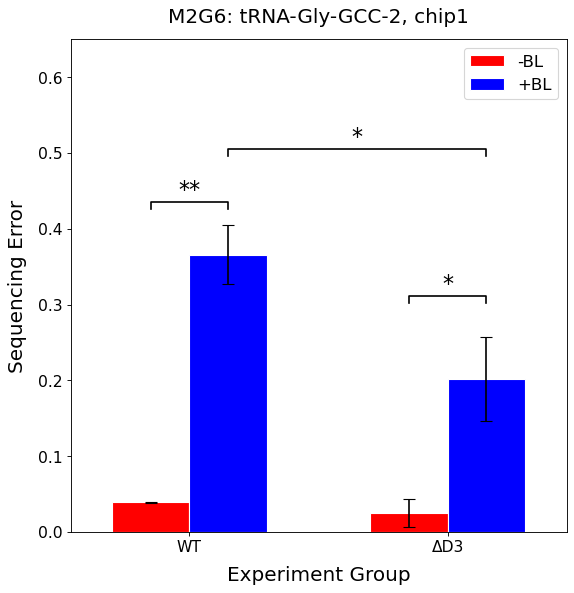

In [11]:
barWidth = 0.3
 
plt.figure(figsize=(8, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14) 
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.titlepad'] = 15

# Set position of bar on X axis
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, data_group1['mean'], yerr=data_group1['STD'], color='red', width=barWidth, edgecolor='white', label='-BL', capsize=5)
plt.bar(r2, data_group2['mean'], yerr=data_group2['STD'], color='blue', width=barWidth, edgecolor='white', label='+BL',capsize=5)

x1, x2 = 0, 0.3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data_group2['mean'].max() + 0.06, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col,fontsize = 20)

x1, x2 = 1, 1.3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data_group2['mean'].min() + 0.1, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize = 20)

x1, x2 = 0.3, 1.3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data_group2['mean'].max() + 0.13, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize = 20)
 
# Add xticks on the middle of the group bars
plt.xlabel("Experiment Group",fontsize=18,labelpad=10)
plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
plt.title("M2G6: tRNA-Gly-GCC-2, chip1", fontsize=18)

plt.xticks([r + 0.15 for r in range(2)], ['WT','ΔD3'])
plt.ylim(0,0.65)
    
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.savefig('m2G6_GCC_2_chip1_new.png',dpi=500, bbox_inches='tight')
plt.show()

----------------------------------------------------------------------------------------
- m2G6 in Gly-tRNA-CCC-2: steps are exactly the same as Gly-tRNA-GCC-2 above

----------------------------------------------------------------------------------------

In [12]:
CCC_2_data = pd.read_csv('tRNA-Gly-CCC-2_sum.csv')
CCC_2_data = pd.DataFrame(CCC_2_data)

In [13]:
data_group1 = [[CCC_2_data.iloc[5]['chip2.0101'],CCC_2_data.iloc[5]['chip2.0103'],CCC_2_data.iloc[5]['chip2.0105']],[CCC_2_data.iloc[5]['chip2.0107'],CCC_2_data.iloc[5]['chip2.0109'],CCC_2_data.iloc[5]['chip2.0111']]]
data_group2 = [[CCC_2_data.iloc[5]['chip2.0102'],CCC_2_data.iloc[5]['chip2.0104'],CCC_2_data.iloc[5]['chip2.0106']],[CCC_2_data.iloc[5]['chip2.0108'],CCC_2_data.iloc[5]['chip2.0110'],CCC_2_data.iloc[5]['chip2.0112']]]
                      

In [14]:
stats.ttest_ind(data_group1[0],data_group2[0], equal_var=False)

TtestResult(statistic=-10.179186278964163, pvalue=0.0012124851817420684, df=3.364364233693904)

In [15]:
stats.ttest_ind(data_group1[1],data_group2[1], equal_var=False)

TtestResult(statistic=-7.210503686950808, pvalue=0.0023644824864363072, df=3.8073000976981675)

In [16]:
stats.ttest_ind(data_group2[0],data_group2[1], equal_var=False)

TtestResult(statistic=3.1237113046566214, pvalue=0.04340912048966577, df=3.443719686211641)

In [17]:
data_group1 = pd.DataFrame(data_group1)
data_group2 = pd.DataFrame(data_group2)
data_group1['mean'] = data_group1.mean(axis=1)
data_group2['mean'] = data_group2.mean(axis=1)
data_group1['STD'] = data_group1.std(axis=1)
data_group2['STD'] = data_group2.std(axis=1)

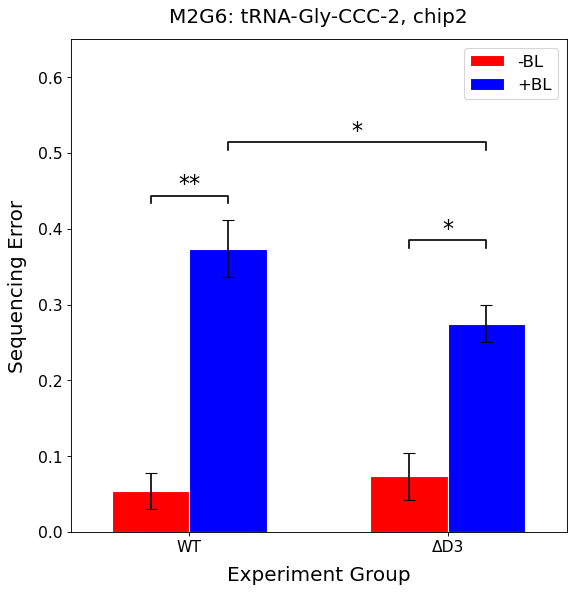

In [18]:
barWidth = 0.3
 
plt.figure(figsize=(8, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14) 
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.titlepad'] = 15

# Set position of bar on X axis
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, data_group1['mean'], yerr=data_group1['STD'], color='red', width=barWidth, edgecolor='white', label='-BL', capsize=5)
plt.bar(r2, data_group2['mean'], yerr=data_group2['STD'], color='blue', width=barWidth, edgecolor='white', label='+BL',capsize=5)

x1, x2 = 0, 0.3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data_group2['mean'].max() + 0.06, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col,fontsize = 20)

x1, x2 = 1, 1.3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data_group2['mean'].min() + 0.1, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize = 20)

x1, x2 = 0.3, 1.3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data_group2['mean'].max() + 0.13, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize = 20)
 
# Add xticks on the middle of the group bars
plt.xlabel("Experiment Group",fontsize=18,labelpad=10)
plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
plt.title("M2G6: tRNA-Gly-CCC-2, chip2", fontsize=18)

plt.xticks([r + 0.15 for r in range(2)], ['WT','ΔD3'])
plt.ylim(0,0.65)
    
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.savefig('m2G6_CCC_2_chip2_new.png',dpi=500, bbox_inches='tight')
plt.show()

----------------------------------------------------------------------------------------
## Plotting mismatch profiles at m2G position in different groups

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
- Import vaf data of Gly-tRNA-GCC-2 and Gly-tRNA-CCC-2

----------------------------------------------------------------------------------------

In [52]:
# loop and import data
batch_list = ['chip1','chip2']
sample_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

df={}
df_GCC_2={}
df_CCC_2={}

for batch_number in batch_list:
        for sample_number in sample_list:
        
            df['{}.01{}'.format(batch_number,sample_number)] = pd.read_csv('{}.01{}.bam_readcount.filtered.tsv'.format(batch_number,sample_number), sep='\t')
            df['{}.01{}'.format(batch_number,sample_number)]['vaf'] = df['{}.01{}'.format(batch_number,sample_number)]['count']/df['{}.01{}'.format(batch_number,sample_number)]['depth']

            df_GCC_2['{}.01{}'.format(batch_number,sample_number)] = df['{}.01{}'.format(batch_number,sample_number)][df['{}.01{}'.format(batch_number,sample_number)]['chrom'] == 'tRNA-Gly-GCC-2']
            df_CCC_2['{}.01{}'.format(batch_number,sample_number)] = df['{}.01{}'.format(batch_number,sample_number)][df['{}.01{}'.format(batch_number,sample_number)]['chrom'] == 'tRNA-Gly-CCC-2']

----------------------------------------------------------------------------------------
- Reformat data (tRNA-Gly-GCC-2)

----------------------------------------------------------------------------------------

In [53]:
df_GCC_2_chip1_2_m2G6 = df_GCC_2['chip1.0102'][df_GCC_2['chip1.0102']['position'] == 45].sort_values(by='vaf', ascending=False)
df_GCC_2_chip1_4_m2G6 = df_GCC_2['chip1.0104'][df_GCC_2['chip1.0104']['position'] == 45].sort_values(by='vaf', ascending=False)
df_GCC_2_chip1_6_m2G6 = df_GCC_2['chip1.0106'][df_GCC_2['chip1.0106']['position'] == 45].sort_values(by='vaf', ascending=False)

df_GCC_2_chip1_2_m2G6_THUMPD3_ko = df_GCC_2['chip1.0108'][df_GCC_2['chip1.0108']['position'] == 45].sort_values(by='vaf', ascending=False)
df_GCC_2_chip1_4_m2G6_THUMPD3_ko = df_GCC_2['chip1.0110'][df_GCC_2['chip1.0110']['position'] == 45].sort_values(by='vaf', ascending=False)
df_GCC_2_chip1_6_m2G6_THUMPD3_ko = df_GCC_2['chip1.0112'][df_GCC_2['chip1.0112']['position'] == 45].sort_values(by='vaf', ascending=False)


In [54]:
df_GCC_2_chip1_2_m2G6

,chrom,position,ref,base,vaf,depth,count,avg_basequality,avg_pos_as_fraction
4374,tRNA-Gly-GCC-2,45,G,-G,2.114006e-01,1607616,339851,0.00,0.77
4362,tRNA-Gly-GCC-2,45,G,T,8.300054e-02,1607616,133433,25.00,0.78
4361,tRNA-Gly-GCC-2,45,G,C,7.334525e-02,1607616,117911,31.66,0.77
4360,tRNA-Gly-GCC-2,45,G,A,7.621845e-03,1607616,12253,31.69,0.77
4375,tRNA-Gly-GCC-2,45,G,-GG,5.940473e-04,1607616,955,0.00,0.76
4370,tRNA-Gly-GCC-2,45,G,+T,3.377672e-04,1607616,543,0.00,0.74
4363,tRNA-Gly-GCC-2,45,G,+A,1.219197e-04,1607616,196,0.00,0.73
4376,tRNA-Gly-GCC-2,45,G,-GGTG,8.024304e-05,1607616,129,0.00,0.76
4366,tRNA-Gly-GCC-2,45,G,+C,6.282595e-05,1607616,101,0.00,0.77
4372,tRNA-Gly-GCC-2,45,G,+TC,6.842430e-06,1607616,11,0.00,0.77


----------------------------------------------------------------------------------------
- Generate unique lists of all mismatch types (strings)

----------------------------------------------------------------------------------------

In [55]:
Mismatch_list_control = list(set(df_GCC_2_chip1_2_m2G6['base'].tolist() + df_GCC_2_chip1_4_m2G6['base'].tolist() + df_GCC_2_chip1_6_m2G6['base'].tolist()))


In [56]:
Mismatch_list_control.sort(reverse=True)

In [57]:
Mismatch_list_control

['T',
 'C',
 'A',
 '-GGTGGTTCA',
 '-GGTGG',
 '-GGTG',
 '-GG',
 '-G',
 '+TTATT',
 '+TT',
 '+TC',
 '+TA',
 '+T',
 '+GTT',
 '+GT',
 '+GC',
 '+CC',
 '+C',
 '+AC',
 '+AA',
 '+A']

In [58]:
Mismatch_list_THUMPD3_ko = list(set(df_GCC_2_chip1_2_m2G6_THUMPD3_ko['base'].tolist() + df_GCC_2_chip1_4_m2G6_THUMPD3_ko['base'].tolist() + df_GCC_2_chip1_6_m2G6_THUMPD3_ko['base'].tolist()))
Mismatch_list_THUMPD3_ko.sort(reverse=True)
Mismatch_list_THUMPD3_ko

['T',
 'C',
 'A',
 '-GGTGG',
 '-GGTG',
 '-GG',
 '-G',
 '+TGT',
 '+TC',
 '+T',
 '+GTC',
 '+GT',
 '+GC',
 '+GA',
 '+CCT',
 '+CC',
 '+CA',
 '+C',
 '+AC',
 '+A']

----------------------------------------------------------------------------------------
- Plot only for T, C, A and -G patterns

----------------------------------------------------------------------------------------

In [59]:
Mismatch_list_specific = ['T','C','A','-G']

----------------------------------------------------------------------------------------
- Extract data that matches the mismatch types in the list above

----------------------------------------------------------------------------------------

In [26]:
Mismatch_m2G_GCC_2 = {}

for i in Mismatch_list_control:
    
    if i in df_GCC_2_chip1_2_m2G6['base'].values:
    
        i_1 = float(df_GCC_2_chip1_2_m2G6[df_GCC_2_chip1_2_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_GCC_2_chip1_4_m2G6['base'].values:
    
        i_2 = float(df_GCC_2_chip1_4_m2G6[df_GCC_2_chip1_4_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_GCC_2_chip1_6_m2G6['base'].values:
    
        i_3 = float(df_GCC_2_chip1_6_m2G6[df_GCC_2_chip1_6_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_GCC_2[i] = [i_1,i_2,i_3]

In [28]:
Mismatch_m2G_GCC_2 = {}

for i in Mismatch_list_THUMPD3_ko:
    
    if i in df_GCC_2_chip1_2_m2G6_THUMPD3_ko['base'].values:
    
        i_1 = float(df_GCC_2_chip1_2_m2G6_THUMPD3_ko[df_GCC_2_chip1_2_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_GCC_2_chip1_4_m2G6_THUMPD3_ko['base'].values:
    
        i_2 = float(df_GCC_2_chip1_4_m2G6_THUMPD3_ko[df_GCC_2_chip1_4_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_GCC_2_chip1_6_m2G6_THUMPD3_ko['base'].values:
    
        i_3 = float(df_GCC_2_chip1_6_m2G6_THUMPD3_ko[df_GCC_2_chip1_6_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_GCC_2[i] = [i_1,i_2,i_3]

In [60]:
Mismatch_m2G_GCC_2_specific_Control = {}

for i in Mismatch_list_specific:
    
    if i in df_GCC_2_chip1_2_m2G6['base'].values:
    
        i_1 = float(df_GCC_2_chip1_2_m2G6[df_GCC_2_chip1_2_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_GCC_2_chip1_4_m2G6['base'].values:
    
        i_2 = float(df_GCC_2_chip1_4_m2G6[df_GCC_2_chip1_4_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_GCC_2_chip1_6_m2G6['base'].values:
    
        i_3 = float(df_GCC_2_chip1_6_m2G6[df_GCC_2_chip1_6_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_GCC_2_specific_Control[i] = [i_1,i_2,i_3]

In [61]:
Mismatch_m2G_GCC_2_specific_THUMPD3_ko = {}

for i in Mismatch_list_specific:
    
    if i in df_GCC_2_chip1_2_m2G6_THUMPD3_ko['base'].values:
    
        i_1 = float(df_GCC_2_chip1_2_m2G6_THUMPD3_ko[df_GCC_2_chip1_2_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_GCC_2_chip1_4_m2G6_THUMPD3_ko['base'].values:
    
        i_2 = float(df_GCC_2_chip1_4_m2G6_THUMPD3_ko[df_GCC_2_chip1_4_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_GCC_2_chip1_6_m2G6_THUMPD3_ko['base'].values:
    
        i_3 = float(df_GCC_2_chip1_6_m2G6_THUMPD3_ko[df_GCC_2_chip1_6_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_GCC_2_specific_THUMPD3_ko[i] = [i_1,i_2,i_3]

In [62]:
# save as dataframe
Mismatch_m2G_GCC_2 = pd.DataFrame(Mismatch_m2G_GCC_2)
Mismatch_m2G_GCC_2_specific_Control = pd.DataFrame(Mismatch_m2G_GCC_2_specific_Control)
Mismatch_m2G_GCC_2_specific_THUMPD3_ko = pd.DataFrame(Mismatch_m2G_GCC_2_specific_THUMPD3_ko)

In [63]:
# transpose the dataframe
Mismatch_m2G_GCC_2 =Mismatch_m2G_GCC_2.T
Mismatch_m2G_GCC_2_specific_Control=Mismatch_m2G_GCC_2_specific_Control.T
Mismatch_m2G_GCC_2_specific_THUMPD3_ko=Mismatch_m2G_GCC_2_specific_THUMPD3_ko.T

In [64]:
# calculate mean and standard deviation of each row 
Mismatch_m2G_GCC_2['mean'] = Mismatch_m2G_GCC_2.mean(axis=1)
Mismatch_m2G_GCC_2['STD'] = Mismatch_m2G_GCC_2.std(axis=1)
Mismatch_m2G_GCC_2_specific_Control['mean'] = Mismatch_m2G_GCC_2_specific_Control.mean(axis=1)
Mismatch_m2G_GCC_2_specific_Control['STD'] = Mismatch_m2G_GCC_2_specific_Control.std(axis=1)
Mismatch_m2G_GCC_2_specific_THUMPD3_ko['mean'] = Mismatch_m2G_GCC_2_specific_THUMPD3_ko.mean(axis=1)
Mismatch_m2G_GCC_2_specific_THUMPD3_ko['STD'] = Mismatch_m2G_GCC_2_specific_THUMPD3_ko.std(axis=1)

In [65]:
Mismatch_m2G_GCC_2

,0,1,2,mean,STD
T,1.681236e-02,0.032933,0.056621,3.163448e-02,1.640456e-02
C,6.327511e-02,0.085316,0.060193,5.791325e-02,2.711478e-02
A,1.032762e-03,0.001529,0.000959,9.893325e-04,4.552762e-04
-GCCA,1.444423e-06,0.000000,0.000000,5.213610e-07,5.959897e-07
-GCC,2.166634e-06,0.000327,0.000264,1.862798e-04,1.242485e-04
-GC,1.227759e-05,0.000016,0.000159,6.343856e-05,5.903326e-05
-G,5.313310e-03,0.007077,0.017374,9.000736e-03,5.019836e-03
+TCCC,7.222115e-07,0.000000,0.000000,2.606805e-07,2.979948e-07
+TCC,1.444423e-06,0.000002,0.000000,1.012785e-06,6.803309e-07
+TC,2.166634e-06,0.000005,0.000000,2.435464e-06,1.898736e-06


In [66]:
Mismatch_m2G_GCC_2_specific_Control

,0,1,2,mean,STD
T,0.083001,0.088007,0.072757,0.081255,0.006347
C,0.073345,0.073440,0.055686,0.067490,0.008347
A,0.007622,0.007319,0.007165,0.007368,0.000190
-G,0.211401,0.237578,0.177142,0.208707,0.024746


----------------------------------------------------------------------------------------
- Make Plots

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
- Analyse and plot complete list of different types of mismatch profile at m2G site

----------------------------------------------------------------------------------------

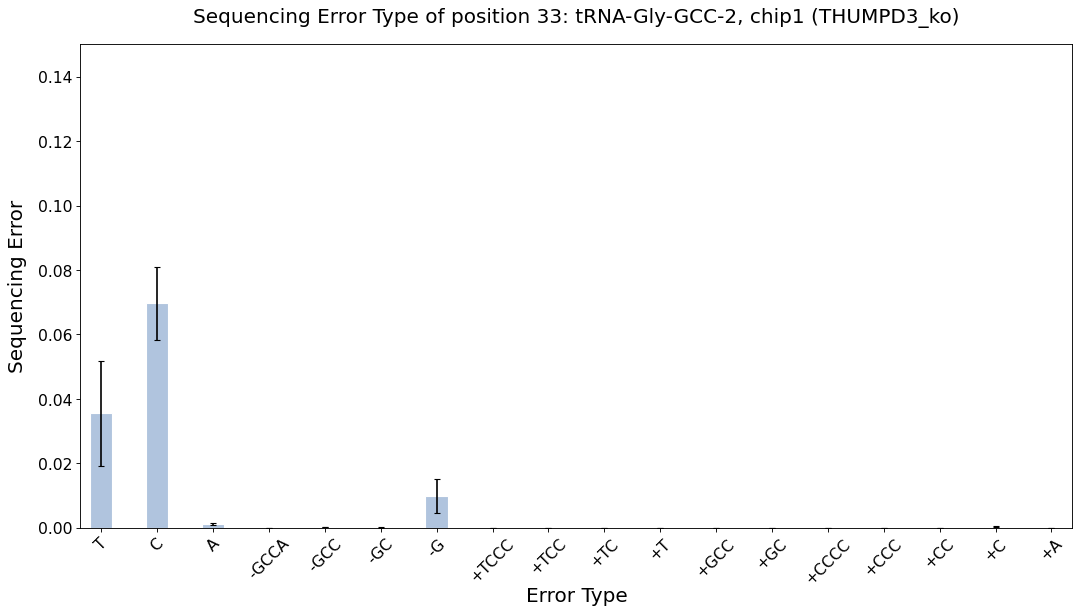

In [374]:
barWidth = 0.4
 
plt.figure(figsize=(16, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14) 
plt.rcParams['axes.xmargin'] = 0.01

# Set position of bar on X axis
r1 = np.arange(len(Mismatch_m2G_GCC_2))
 
# Make the plot
plt.bar(r1, Mismatch_m2G_GCC_2['mean'], yerr=Mismatch_m2G_GCC_2['STD'], color='lightsteelblue', width=barWidth, edgecolor='white', capsize=3)
 
# Add xticks on the middle of the group bars
plt.xlabel("Error Type",fontsize=18,labelpad=0)
plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
plt.title("Sequencing Error Type of position 33: tRNA-Gly-GCC-2, chip1 (THUMPD3_ko)", fontsize=18)

plt.xticks([r for r in range(len(Mismatch_m2G_GCC_2))], Mismatch_m2G_GCC_2.index.to_list(), rotation=45)
plt.ylim(0,0.15)
    
# Create legend & Show graphic
plt.savefig('position33_GCC_2_chip1_error_type_THUMPD3_ko.png',dpi=500, bbox_inches='tight')
plt.show()

----------------------------------------------------------------------------------------
- plot levels of (-G, G->T, G->A, G->C) mismatchs and deletion at m2G site in different samples with and wo blue light treatment and enzyme depletion

----------------------------------------------------------------------------------------

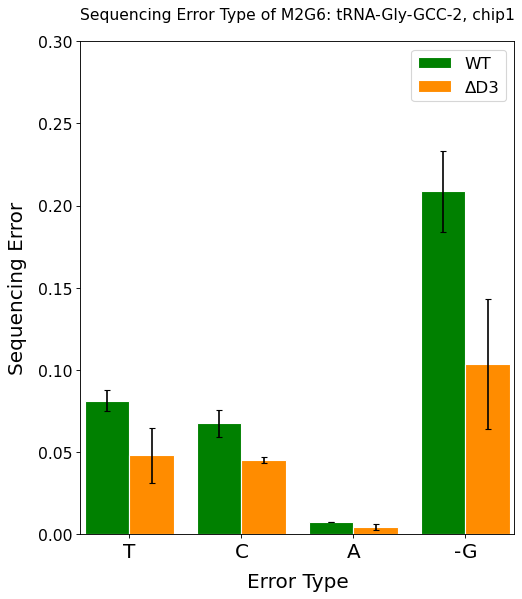

In [67]:
barWidth = 0.4
 
plt.figure(figsize=(7, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=18) 
plt.rcParams['axes.xmargin'] = 0.01
plt.rcParams['axes.titlepad'] = 20

# Set position of bar on X axis
r1 = np.arange(len(Mismatch_m2G_GCC_2_specific_Control))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, Mismatch_m2G_GCC_2_specific_Control['mean'], yerr=Mismatch_m2G_GCC_2_specific_Control['STD'], color='green', width=barWidth, edgecolor='white', label='WT', capsize=3)
plt.bar(r2, Mismatch_m2G_GCC_2_specific_THUMPD3_ko['mean'], yerr=Mismatch_m2G_GCC_2_specific_THUMPD3_ko['STD'], color='darkorange', width=barWidth, edgecolor='white', label='ΔD3',capsize=3)

# Add xticks on the middle of the group bars
plt.xlabel("Error Type",fontsize=18,labelpad=10)
plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
plt.title("Sequencing Error Type of M2G6: tRNA-Gly-GCC-2, chip1", fontsize=14)

plt.xticks([r + 0.2 for r in range(len(Mismatch_list_specific))], Mismatch_list_specific)
plt.ylim(0,0.3)
    
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.savefig('m2G6_GCC_2_chip1_error_type_Control_versus_THUMPD3_ko_new.png',dpi=500, bbox_inches='tight')
plt.show()

----------------------------------------------------------------------------------------
- Exactly the same part above but for tRNA-Gly-CCC-2

----------------------------------------------------------------------------------------

In [68]:
df_CCC_2_chip2_2_m2G6 = df_CCC_2['chip2.0102'][df_CCC_2['chip2.0102']['position'] == 45].sort_values(by='vaf', ascending=False)
df_CCC_2_chip2_4_m2G6 = df_CCC_2['chip2.0104'][df_CCC_2['chip2.0104']['position'] == 45].sort_values(by='vaf', ascending=False)
df_CCC_2_chip2_6_m2G6 = df_CCC_2['chip2.0106'][df_CCC_2['chip2.0106']['position'] == 45].sort_values(by='vaf', ascending=False)
df_CCC_2_chip2_2_m2G6_THUMPD3_ko = df_CCC_2['chip2.0108'][df_CCC_2['chip2.0108']['position'] == 45].sort_values(by='vaf', ascending=False)
df_CCC_2_chip2_4_m2G6_THUMPD3_ko = df_CCC_2['chip2.0110'][df_CCC_2['chip2.0110']['position'] == 45].sort_values(by='vaf', ascending=False)
df_CCC_2_chip2_6_m2G6_THUMPD3_ko = df_CCC_2['chip2.0112'][df_CCC_2['chip2.0112']['position'] == 45].sort_values(by='vaf', ascending=False)

In [69]:
Mismatch_list_control = list(set(df_CCC_2_chip2_2_m2G6['base'].tolist() + df_CCC_2_chip2_4_m2G6['base'].tolist() + df_CCC_2_chip2_6_m2G6['base'].tolist()))

Mismatch_list_control.sort(reverse=True)

Mismatch_m2G_CCC_2 = {}

for i in Mismatch_list_control:
    
    if i in df_CCC_2_chip2_2_m2G6['base'].values:
    
        i_1 = float(df_CCC_2_chip2_2_m2G6[df_CCC_2_chip2_2_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_CCC_2_chip2_4_m2G6['base'].values:
    
        i_2 = float(df_CCC_2_chip2_4_m2G6[df_CCC_2_chip2_4_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_CCC_2_chip2_6_m2G6['base'].values:
    
        i_3 = float(df_CCC_2_chip2_6_m2G6[df_CCC_2_chip2_6_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_CCC_2[i] = [i_1,i_2,i_3]
    
Mismatch_m2G_CCC_2 = pd.DataFrame(Mismatch_m2G_CCC_2)
Mismatch_m2G_CCC_2 =Mismatch_m2G_CCC_2.T
Mismatch_m2G_CCC_2['mean'] = Mismatch_m2G_CCC_2.mean(axis=1)
Mismatch_m2G_CCC_2['STD'] = Mismatch_m2G_CCC_2.std(axis=1)

In [70]:
Mismatch_list_control = list(set(df_CCC_2_chip2_2_m2G6_THUMPD3_ko['base'].tolist() + df_CCC_2_chip2_4_m2G6_THUMPD3_ko['base'].tolist() + df_CCC_2_chip2_6_m2G6_THUMPD3_ko['base'].tolist()))

Mismatch_list_control.sort(reverse=True)

Mismatch_m2G_CCC_2 = {}

for i in Mismatch_list_control:
    
    if i in df_CCC_2_chip2_2_m2G6_THUMPD3_ko['base'].values:
    
        i_1 = float(df_CCC_2_chip2_2_m2G6_THUMPD3_ko[df_CCC_2_chip2_2_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_CCC_2_chip2_4_m2G6_THUMPD3_ko['base'].values:
    
        i_2 = float(df_CCC_2_chip2_4_m2G6_THUMPD3_ko[df_CCC_2_chip2_4_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_CCC_2_chip2_6_m2G6_THUMPD3_ko['base'].values:
    
        i_3 = float(df_CCC_2_chip2_6_m2G6_THUMPD3_ko[df_CCC_2_chip2_6_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_CCC_2[i] = [i_1,i_2,i_3]
    
Mismatch_m2G_CCC_2 = pd.DataFrame(Mismatch_m2G_CCC_2)
Mismatch_m2G_CCC_2 =Mismatch_m2G_CCC_2.T
Mismatch_m2G_CCC_2['mean'] = Mismatch_m2G_CCC_2.mean(axis=1)
Mismatch_m2G_CCC_2['STD'] = Mismatch_m2G_CCC_2.std(axis=1)

In [71]:
Mismatch_m2G_CCC_2_specific_Control = {}

for i in Mismatch_list_specific:
    
    if i in df_CCC_2_chip2_2_m2G6['base'].values:
    
        i_1 = float(df_CCC_2_chip2_2_m2G6[df_CCC_2_chip2_2_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_CCC_2_chip2_4_m2G6['base'].values:
    
        i_2 = float(df_CCC_2_chip2_4_m2G6[df_CCC_2_chip2_4_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_CCC_2_chip2_6_m2G6['base'].values:
    
        i_3 = float(df_CCC_2_chip2_6_m2G6[df_CCC_2_chip2_6_m2G6['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_CCC_2_specific_Control[i] = [i_1,i_2,i_3]

Mismatch_m2G_CCC_2_specific_Control = pd.DataFrame(Mismatch_m2G_CCC_2_specific_Control)
Mismatch_m2G_CCC_2_specific_Control =Mismatch_m2G_CCC_2_specific_Control.T
Mismatch_m2G_CCC_2_specific_Control['mean'] = Mismatch_m2G_CCC_2_specific_Control.mean(axis=1)
Mismatch_m2G_CCC_2_specific_Control['STD'] = Mismatch_m2G_CCC_2_specific_Control.std(axis=1)

In [72]:
Mismatch_m2G_CCC_2_specific_THUMPD3_ko = {}

for i in Mismatch_list_specific:
    
    if i in df_CCC_2_chip2_2_m2G6_THUMPD3_ko['base'].values:
    
        i_1 = float(df_CCC_2_chip2_2_m2G6_THUMPD3_ko[df_CCC_2_chip2_2_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_1 = 0
    
    if i in df_CCC_2_chip2_4_m2G6_THUMPD3_ko['base'].values:
    
        i_2 = float(df_CCC_2_chip2_4_m2G6_THUMPD3_ko[df_CCC_2_chip2_4_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_2 = 0
        
    if i in df_CCC_2_chip2_6_m2G6_THUMPD3_ko['base'].values:
    
        i_3 = float(df_CCC_2_chip2_6_m2G6_THUMPD3_ko[df_CCC_2_chip2_6_m2G6_THUMPD3_ko['base'] == i]['vaf'].values)
    
    else:
        
        i_3 = 0
    
    Mismatch_m2G_CCC_2_specific_THUMPD3_ko[i] = [i_1,i_2,i_3]

Mismatch_m2G_CCC_2_specific_THUMPD3_ko = pd.DataFrame(Mismatch_m2G_CCC_2_specific_THUMPD3_ko)
Mismatch_m2G_CCC_2_specific_THUMPD3_ko =Mismatch_m2G_CCC_2_specific_THUMPD3_ko.T
Mismatch_m2G_CCC_2_specific_THUMPD3_ko['mean'] = Mismatch_m2G_CCC_2_specific_THUMPD3_ko.mean(axis=1)
Mismatch_m2G_CCC_2_specific_THUMPD3_ko['STD'] = Mismatch_m2G_CCC_2_specific_THUMPD3_ko.std(axis=1)

In [73]:
Mismatch_m2G_CCC_2_specific_THUMPD3_ko

,0,1,2,mean,STD
T,0.088280,0.105795,0.086895,0.093657,0.008602
C,0.117201,0.119843,0.088789,0.108611,0.014058
A,0.006878,0.008202,0.007361,0.007480,0.000547
-G,0.057312,0.055654,0.051866,0.054944,0.002279


In [316]:
Mismatch_m2G_CCC_2.to_csv('Mismatch_m2G_CCC_2.csv')

In [74]:
Mismatch_m2G_CCC_2 

,0,1,2,mean,STD
T,0.088280,0.105795,0.086895,9.365683e-02,8.601705e-03
C,0.117201,0.119843,0.088789,1.086112e-01,1.405797e-02
A,0.006878,0.008202,0.007361,7.480230e-03,5.470903e-04
-GCTGGTGTA,0.000000,0.000001,0.000065,2.205923e-05,3.026721e-05
-GCTGGTGT,0.000006,0.000016,0.000000,7.314716e-06,6.528758e-06
...,...,...,...,...,...
+AATAA,0.000001,0.000000,0.000000,3.384837e-07,4.786882e-07
+AATA,0.000004,0.000000,0.000000,1.353935e-06,1.914753e-06
+AACGATCA,0.000000,0.000001,0.000000,4.403178e-07,6.227034e-07
+AA,0.000001,0.000000,0.000000,3.384837e-07,4.786882e-07


In [410]:
Mismatch_m2G_CCC_2 = Mismatch_m2G_CCC_2[Mismatch_m2G_CCC_2['mean'] >= 0.0001]

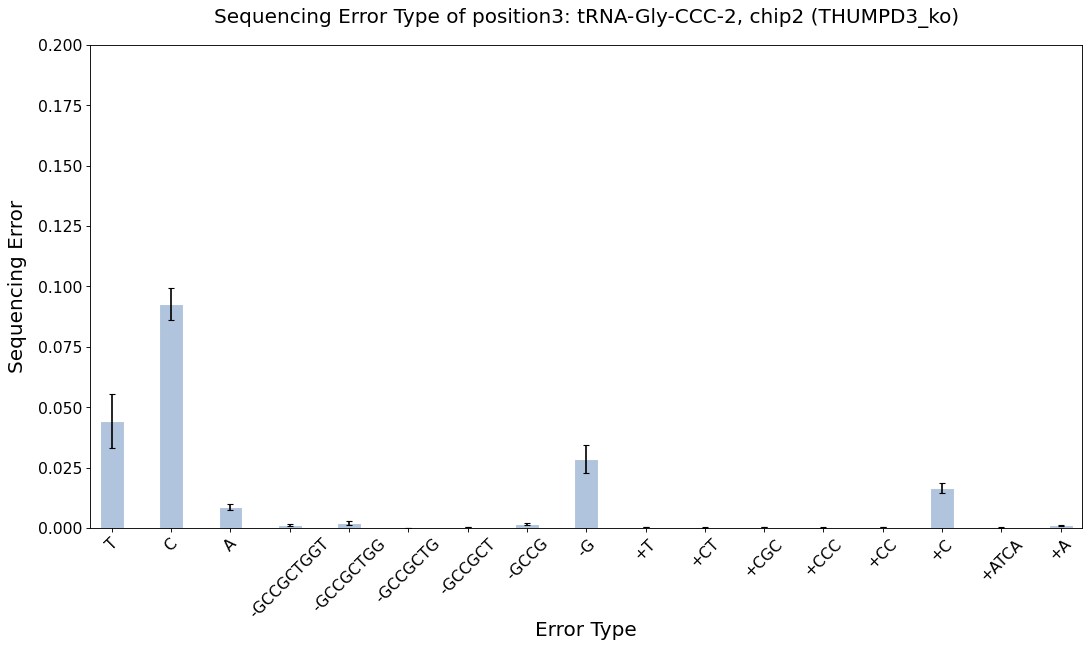

In [411]:
barWidth = 0.4
 
plt.figure(figsize=(16, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14) 
plt.rcParams['axes.xmargin'] = 0.01

# Set position of bar on X axis
r1 = np.arange(len(Mismatch_m2G_CCC_2))
 
# Make the plot
plt.bar(r1, Mismatch_m2G_CCC_2['mean'], yerr=Mismatch_m2G_CCC_2['STD'], color='lightsteelblue', width=barWidth, edgecolor='white', capsize=3)
 
# Add xticks on the middle of the group bars
plt.xlabel("Error Type",fontsize=18,labelpad=0)
plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
plt.title("Sequencing Error Type of position3: tRNA-Gly-CCC-2, chip2 (THUMPD3_ko)", fontsize=18)

plt.xticks([r for r in range(len(Mismatch_m2G_CCC_2))], Mismatch_m2G_CCC_2.index.to_list(), rotation=45)
plt.ylim(0,0.2)
    
# Create legend & Show graphic
plt.savefig('position3_CCC_2_chip2_error_type_THUMPD3_ko.png',dpi=500, bbox_inches='tight')
plt.show()

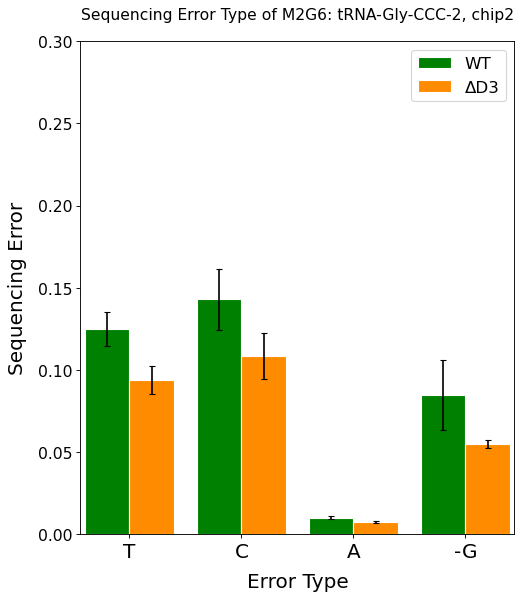

In [75]:
barWidth = 0.4
 
plt.figure(figsize=(7, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=18) 
plt.rcParams['axes.xmargin'] = 0.01
plt.rcParams['axes.titlepad'] = 20

# Set position of bar on X axis
r1 = np.arange(len(Mismatch_list_specific))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, Mismatch_m2G_CCC_2_specific_Control['mean'], yerr=Mismatch_m2G_CCC_2_specific_Control['STD'], color='green', width=barWidth, edgecolor='white', label='WT', capsize=3)
plt.bar(r2, Mismatch_m2G_CCC_2_specific_THUMPD3_ko['mean'], yerr=Mismatch_m2G_CCC_2_specific_THUMPD3_ko['STD'], color='darkorange', width=barWidth, edgecolor='white', label='ΔD3',capsize=3)

# Add xticks on the middle of the group bars
plt.xlabel("Error Type",fontsize=18,labelpad=10)
plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
plt.title("Sequencing Error Type of M2G6: tRNA-Gly-CCC-2, chip2", fontsize=14)

plt.xticks([r + 0.2 for r in range(len(Mismatch_list_specific))], Mismatch_list_specific)
plt.ylim(0,0.3)
    
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.savefig('m2G6_CCC_2_chip2_error_type_Control_versus_THUMPD3_ko_new.png',dpi=500, bbox_inches='tight')
plt.show()